# Ensamble Learning

## Concept

We can define Ensemble Learning in this way it uses multiple machine learning models or multiple set of models for the same algorithm which try to make a better prediction. Ensemble Learning model works by training different models on the same dataset and makes prediction individually and once the prediction is made then these results are combines with some statistical methods to get final prediction.  

In one sentence we can explain like this there is a dataset where multiple algorithms are trained in the same dataset and then finally predictions are made based on the outcomes of the individual machine learning algorithms.

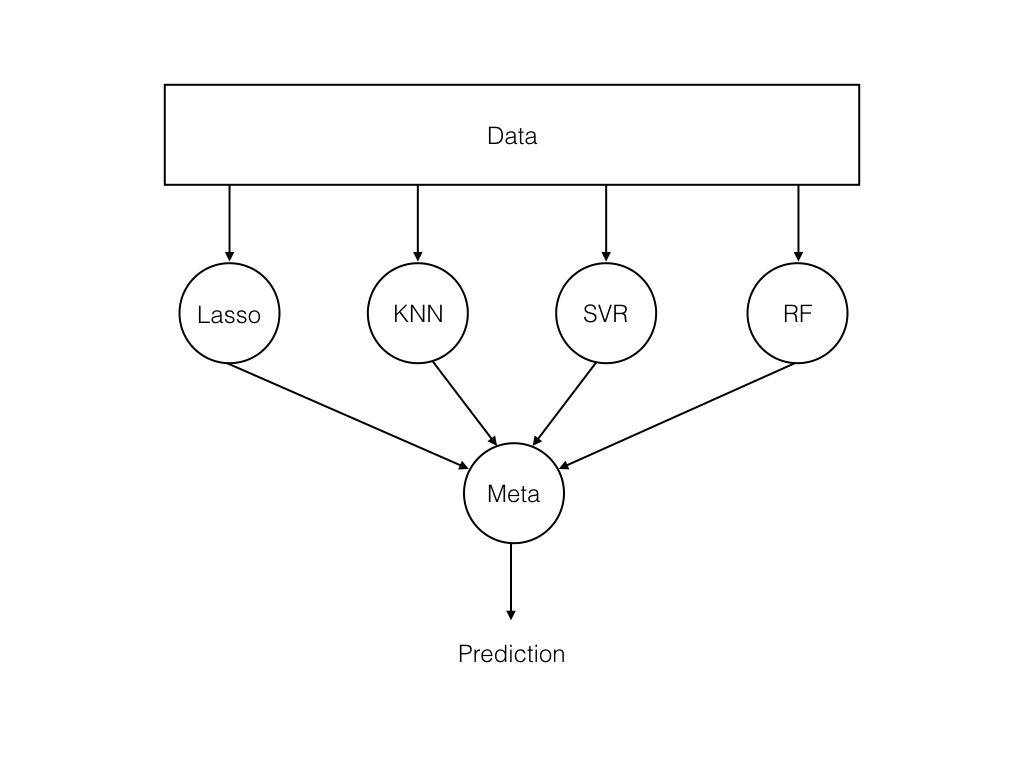

Let me explain thos with an example of cricket team, in cricket team or any other team every few players are specialized in some fields (batting, fast bowling, fielding, keeping, etc.). In the same way every algorithm has its own feature set. There are multiple algorithms and they are specialized in some way so once we combine all of these algorithms it's easy to get the final predictions.

Now, we'll try to understand why we use Ensemble Learning:

If we try to start with a simple model to achive high accuracy by using single algorrithm it might be endup with overfitting or underfitting. 

Every model has its own strength and weakness. If we combine multiple models it will help us to hide weakness of individual models so that we can cover weakness of others.

It creates some errors, the error emerging from any machine model can be broken down into three components mathematically. Following are these component:

- Bias
- Variance
- Irreducible error

To understand these errors have a look at the following figure:

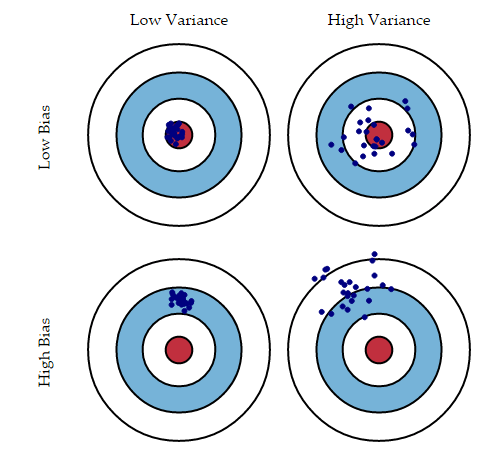

***Bias error*** is useful to quantify how much on an average are the predicted values different from the actual value.

***Variance*** on the other side quantifies how are the prediction made on the same observation different from each other.

Now we will try to understand bias-variance trade off from the following figure. By increasing model complexity, total error will decrease till some point and then it will start to increase. We need to select *optimal model complexity* to get less error. 

- For low complexity model: High bias and low variance
- For high complexity model: low bias nd high variance

If you are getting high bias then you have a fair chance to increase model complexity. And otherside it you are getting high variance, you need to decrease model complexity that's how any machone learning algorithm works.

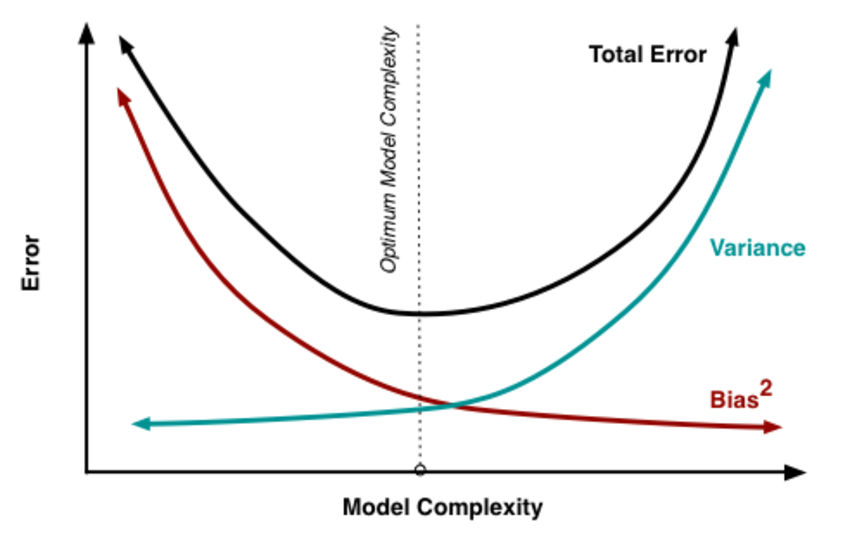

### Type of Ensemble Learning

|Basic Ensemble Techniques|Advance Ensemble Technique|
|------|--------|
|Max Voting|Stacking|
|Averaging|Blending|
|Weighted Average|Bagging|
||Boosting|
|||

|Algorithms based on Bagging|Boosting Algorithms|
|--------|----|
|Bagging meta-estimator|AdaBoost|
|Random Forest|GBM
||XGB|
||Light GBM|
||CatBoost|

#### Max Voting

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point

#### Averaging

Similar to the max voting technique, multiple predictions are made for each data point in averaging.

#### Wighted Average

This is an expresion of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

### Bagging

Bagging is also known as Bootstrapping. It is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set. 

- Combining predictions that belong to the same type.
- Aim to decrease variance, not bias.
- Different training data subsets are randomly drawn with replacement from the entire training dataset. 

To explain bagging Random Forest(below figure) is the best example. It creates multiple subsets like decision tree and it makes a prediction for each decision tree then if random forest is classifer it will take max voting otherwise if it is a regressor it will take average from each of these subsets of the trees.

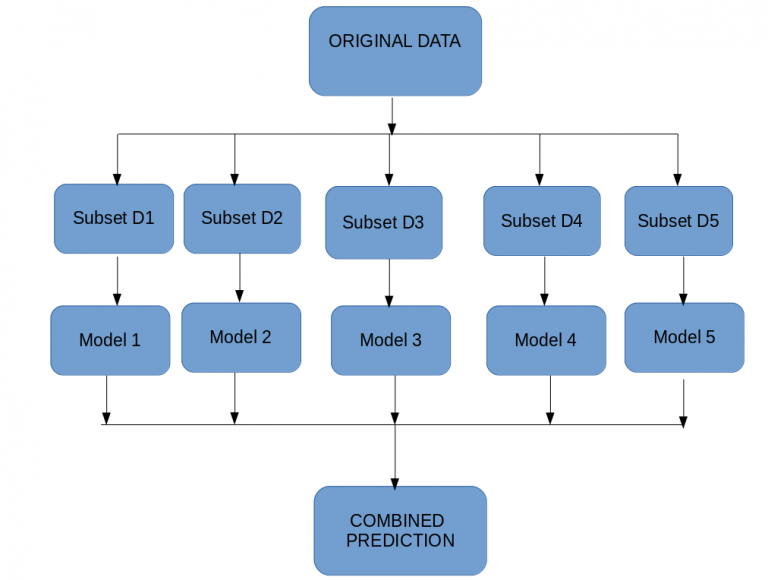

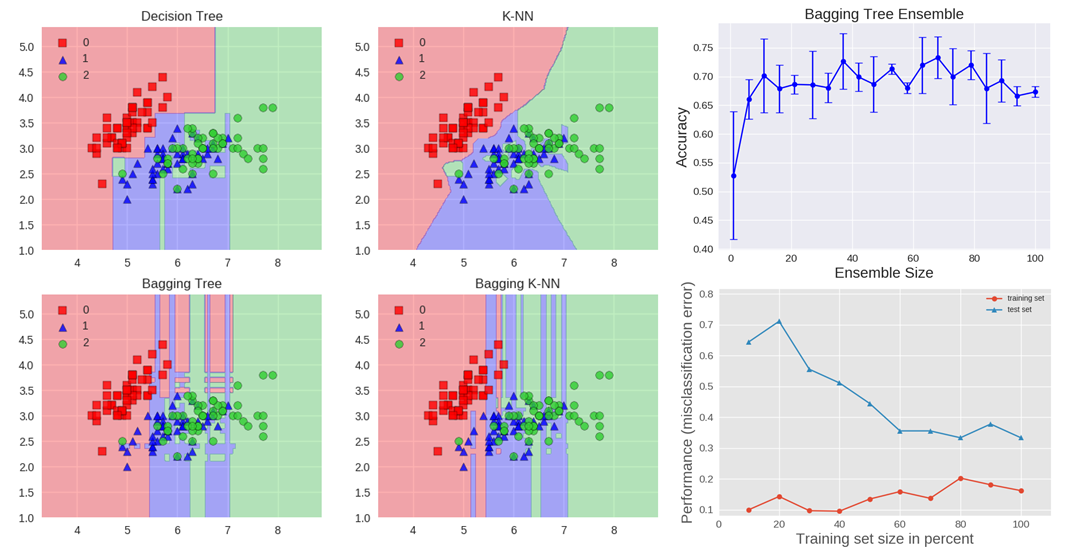

### Boosting

Boosting is sequential process, where each subsequent model attempts to correct the errors of the previous model. The succceeding models are dependent on the previous model. Let's undesteand the way boosting work in the below steps.

- Combining predictions that belong to the different types.
- Aim ti decrease bias, not variance.
- Models are weighted according to their performance.

Let's now understand boosting from the following figure: At first we have out original dataset, our first algorithm creates a plane there for that we have SVM classifier, Random Forest classifier, etc., and it found out that there are some errors in the place. To rectife that errors, we will train other models and after this again we will train other model which identifies errors.

Finally, we combine al three models together which perfectly classify our original dataset.

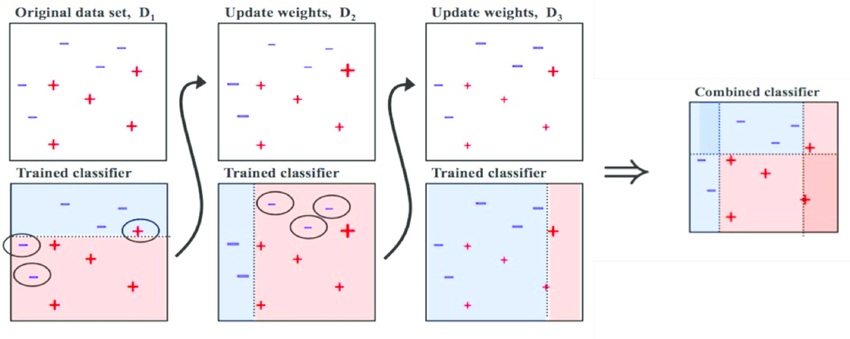

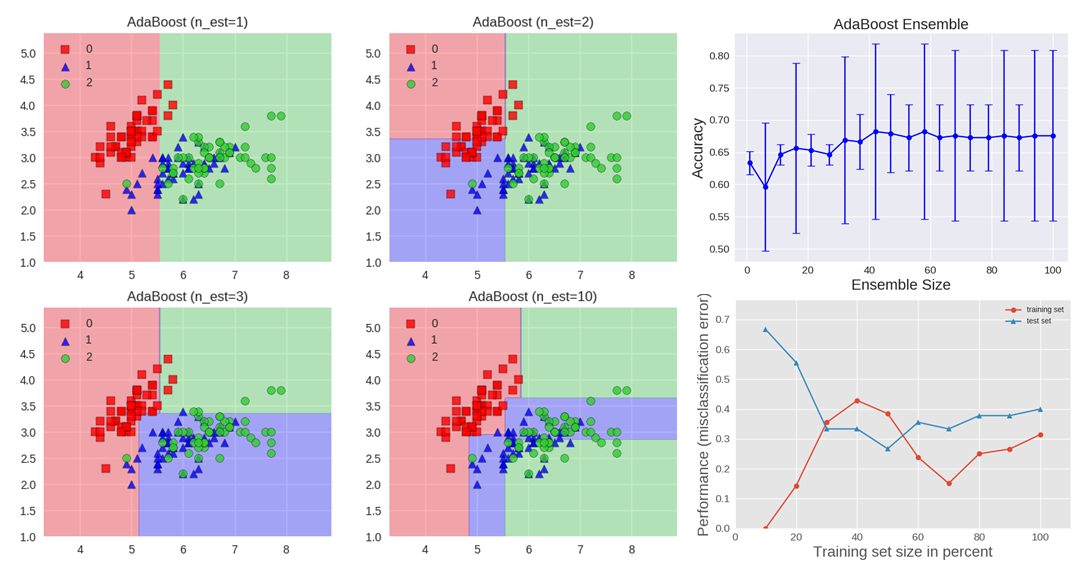

### Algorithms Implementation in sklearn 

- Bagging
    - Random Forest
- Boosting
    - XGBoost
    - AdaBoost
    - Gradient Boosting

*Random Forest* is another ensemble machine learning algorithm that follows the bagging technique.

*XGBoost (extreming Gradient Boosting)* is an advanced implementation of the gradient boosting algorithm.

*Adaptive Boosting or AdaBoost* is one of the simplest boosting algorithms.

*Gradient Boosting or GBM* is another ensemble machine learning algorithm that works for both regression and classification problems.


## Exercise 1: Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
cancer = datasets.load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
X = cancer.data
y = cancer.target

In [8]:
X.shape, y.shape

((569, 30), (569,))

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

### RandomForestClassifier()

A random forest is a estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting.

### AdaBoostClassifier()

It is a estimator that begins by fitting a classifier on the original dataset and then fits additional coples of the classifier on the same dataset but where the weights of incorrectly classifier instances are adjusted such that subsequent classifiers focus more on difficult cases. 


### GradientBoostingClassifier()

It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.


### XBGClassifier()

Data Matrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data. 

In [12]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [13]:
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Let's print the accuracies of Random Forest, AdaBoost, Gradient Boost, XGBoost.

In [14]:
print('Random Forest: ', rfc.score(X_test, y_test))
print('AdaBoost: ', abc.score(X_test, y_test))
print('Gradient Boost: ', gbc.score(X_test, y_test))
print('XGBoost: ', xgb_clf.score(X_test, y_test))

Random Forest:  0.9473684210526315
AdaBoost:  0.9473684210526315
Gradient Boost:  0.9736842105263158
XGBoost:  0.956140350877193


Algunos ejemplos más: [Ensemble Methods](https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb)